## Task: Time Series Forecasting

## Importing Necessary Libraries

In [3]:
!pip -q install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.1 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from ydata_profiling import ProfileReport
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

## Loading and cleaning dataset

In [6]:
df = pd.read_csv('/content/TSLA.CSV')

In [7]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [8]:
df = df[['Date','Close']]

In [9]:
df.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.set_index('Date',inplace=True)

In [12]:
df.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


In [13]:
df.isna().sum()

Close    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 758 entries, 2019-05-21 to 2022-05-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   758 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


## Exploratory Data Analysis

In [15]:
df.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


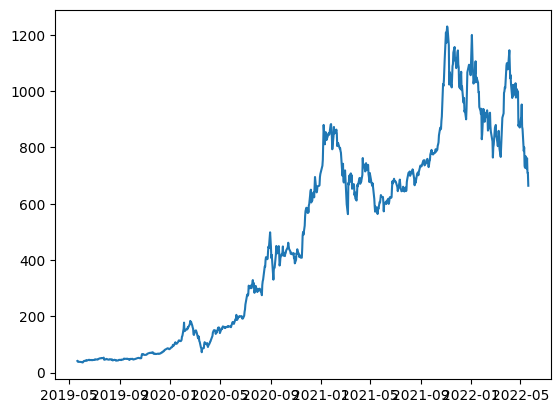

In [16]:
plt.plot(df.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

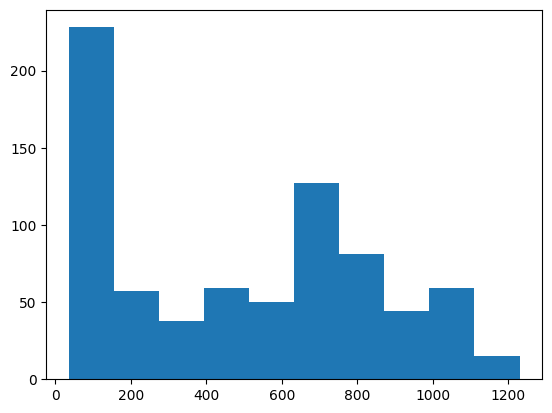

In [17]:
plt.hist(df.Close)

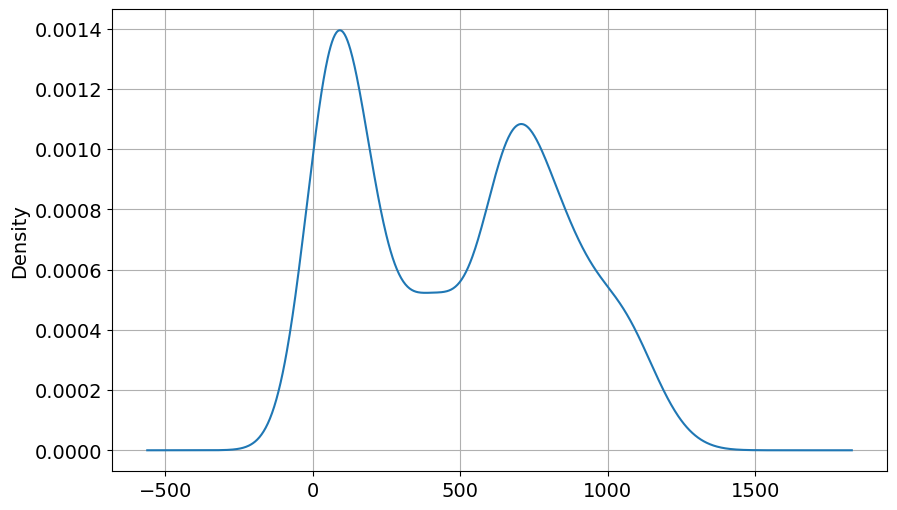

In [18]:
df['Close'].plot(kind='kde',figsize=(10,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid('both')
plt.ylabel('Density',fontsize=14)
plt.show()

In [19]:
rolling_mean = df['Close'].rolling(48).mean()

In [20]:
rolling_std = df['Close'].rolling(48).std()

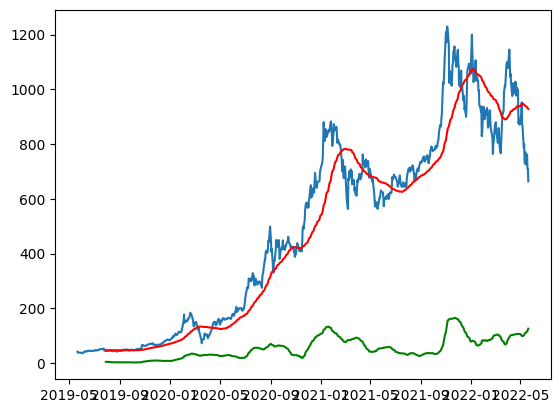

In [21]:
plt.plot(df.Close)
plt.plot(rolling_mean,color='red')
plt.plot(rolling_std,color='green')

In [22]:
pd.Series(adfuller(df.Close)[0:4],index=['Test Statas','P-Value','Lag','Data Points'])

Test Statas     -1.363009
P-Value          0.599876
Lag              9.000000
Data Points    748.000000
dtype: float64

In [23]:
seasonal = seasonal_decompose(df[['Close']],model='additive',period=12)

In [24]:
seasonal.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

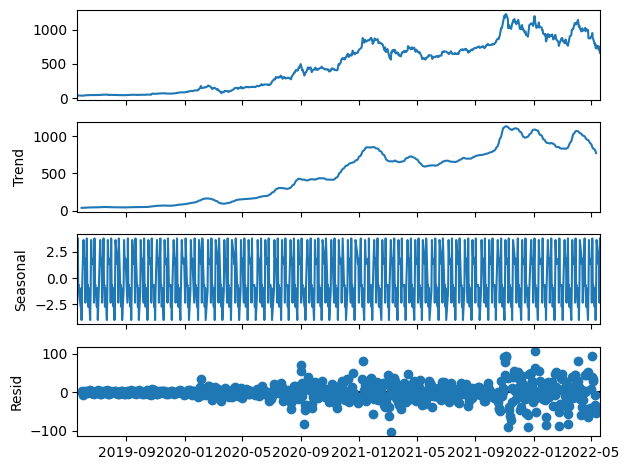

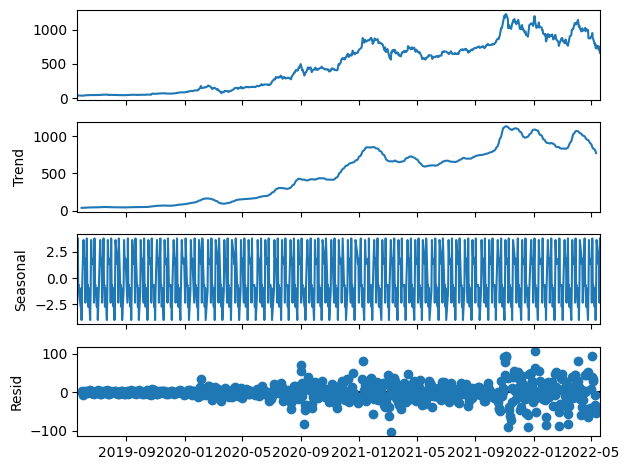

In [25]:
seasonal.plot()

In [26]:
seasonal = seasonal_decompose(df[['Close']],model='multiplicative',period=12)

In [27]:
seasonal.seasonal

Date
2019-05-21    0.998285
2019-05-22    1.007787
2019-05-23    0.997675
2019-05-24    0.992710
2019-05-28    0.988533
                ...   
2022-05-16    1.005393
2022-05-17    1.007126
2022-05-18    1.003538
2022-05-19    0.998285
2022-05-20    1.007787
Name: seasonal, Length: 758, dtype: float64

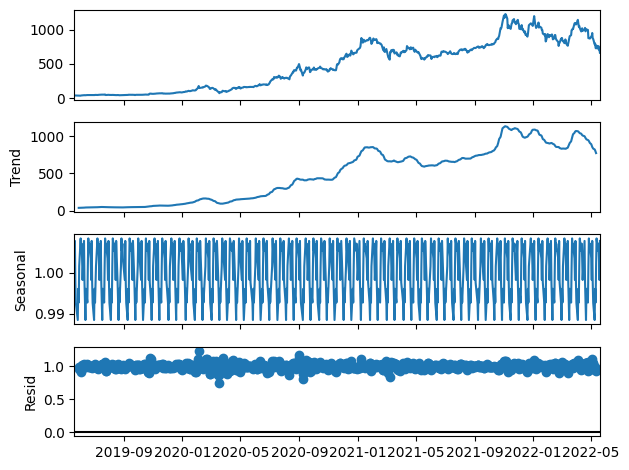

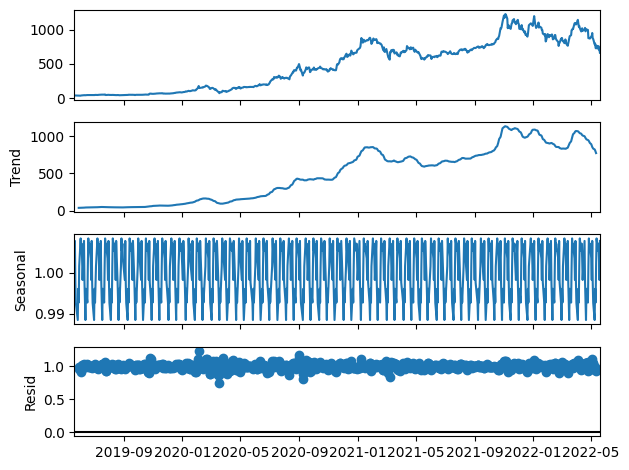

In [28]:
seasonal.plot()

<Axes: ylabel='Close'>

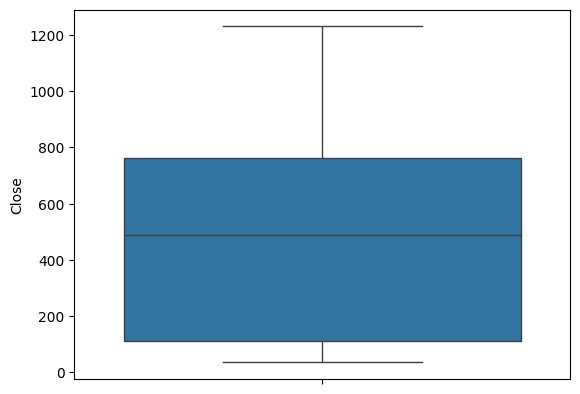

In [29]:
sns.boxplot(df.Close)

In [30]:
ProfileReport(df, title="Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Model Building

In [31]:
df.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


In [32]:
df.shape

(758, 1)

In [33]:
df

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


In [34]:
train_data = list(df['Close'][:-60])
test_data = list(df['Close'][-60:])

### Model Training In Case Of Arima

In [71]:
def train_arima_model(train_data,test_data,order):
  history = train_data
  predictions = list()
  for i in range(len(test_data)):
      model = ARIMA(history,order=order)
      model = model.fit()
      history.append(test_data[i])
      predictions.append(model.forecast(alpha=0.05)[0])
  rmse = np.sqrt(mean_squared_error(test_data,predictions))
  mae = mean_absolute_error(test_data,predictions)
  return predictions,mae,rmse

In [72]:
predictions,mae,rmse = train_arima_model(train_data,test_data,(2,0,0))

In [73]:
mae

33.08637978737597

In [74]:
rmse

43.71641556838752

### Model Evaluation In Case Of Arima

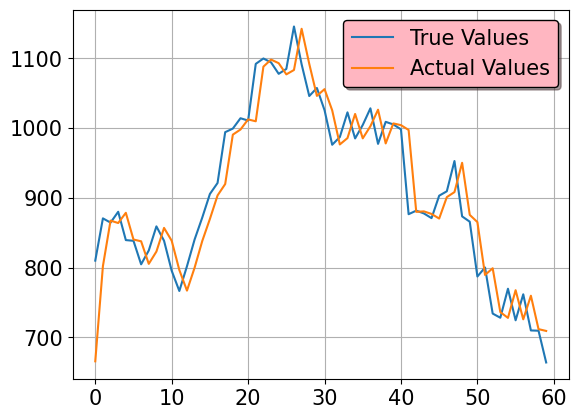

In [75]:
plt.grid(True)
plt.plot(test_data,label='True Values')
plt.plot(predictions,label='Actual Values')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15,shadow=True,facecolor='lightpink',edgecolor='k')
plt.show()

### Model Training In Case Of Sarima

In [76]:
def train_sarima_model(train_data,test_data,order):
  history = train_data
  predictions = list()
  for i in range(len(test_data)):
      model = sm.tsa.statespace.SARIMAX(history, order = order, seasonal_order = (1,1,1,3))
      model = model.fit()
      history.append(test_data[i])
      predictions.append(model.forecast(alpha=0.05)[0])
  rmse = np.sqrt(mean_squared_error(test_data,predictions))
  mae = mean_absolute_error(test_data,predictions)
  return predictions,mae,rmse

In [77]:
predictions,mae,rmse = train_arima_model(train_data,test_data,(0,1,0))

In [78]:
mae

33.07166341145834

In [79]:
rmse

43.76398120814842

### Model Evaluation In Case Of Sarima

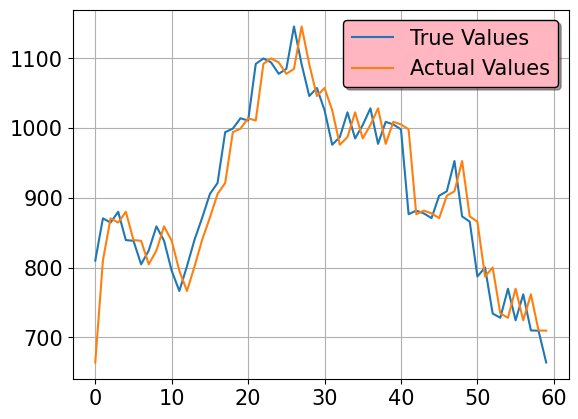

In [80]:
plt.grid(True)
plt.plot(test_data,label='True Values')
plt.plot(predictions,label='Actual Values')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15,shadow=True,facecolor='lightpink',edgecolor='k')
plt.show()